# -*- coding: utf-8 -*-
"""
Created on Mon Apr  4 17:09:51 2022

@author: etienne
"""

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import glob
import re
import pandas as pd
import platform  # Import platform module
import seaborn as sns
plt.style.use('./custom_latex_style.mplstyle')
sns.set_style('darkgrid')

In [2]:
def get_os_type():
    os_type = platform.system().lower()
    if 'linux' in os_type or 'darwin' in os_type:  # Darwin is for MacOS
        return 'unix'
    elif 'windows' in os_type:
        return 'windows'
    else:
        raise ValueError("Unsupported operating system")



In [3]:
# Filename
filename = 'driver_EX1'

# Ensure the outputFiles directory exists
output_dir = 'outputFiles'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Determine the command based on OS type
os_type = get_os_type()
if os_type == 'unix':
    command = 'wine ./bin/AeroDyn_Driver_x64.exe ' + filename + '.dvr'
elif os_type == 'windows':
    command = r'.\bin\AeroDyn_Driver_x64.exe ' + filename + '.dvr'

# Execute the command
os.system(command)

0

In [4]:
# Moves the output files into the correct folder
sourcepath = os.getcwd()
target_folder = r'./outputFiles'
sourcefiles = '*.out'
filelist=glob.glob(sourcefiles)
for single_file in filelist:
    shutil.move(os.path.join(sourcepath, single_file), os.path.join(target_folder, single_file))

In [12]:
filename = 'driver_EX1'
target_folder = r'./outputFiles'
sourcefiles = '*.out'
filelist=glob.glob(target_folder + '/' + sourcefiles)
NumCases=len(filelist)   
# Preallocation
TSR_curve=np.zeros([NumCases])    
Cp_curve=np.zeros([NumCases])
Ct_curve=np.zeros([NumCases])
thrust_curve=np.zeros([NumCases])
speed_curve=np.zeros([NumCases])
wndspeed=np.zeros([NumCases])
power_curve=np.zeros([NumCases])
Cq_curve=np.zeros([NumCases])

for i in range (NumCases):
    
    myFile = r'./outputFiles/' + filename + '.'+ str(i+1) + '.out'
    
    
    # Read wind speed
    s =  pd.read_csv(myFile, skiprows=3, nrows=2)
    a = (re.findall( r'\d+\.*\d*', str(s.head())))
    wndspeed[i] = float(a[1])
    
    
    # Read outputs
    s =  pd.read_csv(myFile, header=5, sep='\s+')
    outputfile = np.array(s)
    time= outputfile[:,0]
    ind = np.argmin(np.abs(time-8)) # read only the last 2 seconds
    
    speed_curve[i]= np.mean(outputfile[ind:-1,1])
    TSR_curve[i]= np.mean(outputfile[ind:-1,2])
    power_curve[i]= np.mean(outputfile[ind:-1,3])
    thrust_curve[i]= np.mean(outputfile[ind:-1,4])
    Cp_curve[i]= np.mean(outputfile[ind:-1,5])
    Ct_curve[i]= np.mean(outputfile[ind:-1,6])
    Cq_curve[i]= np.mean(outputfile[ind:-1,7])

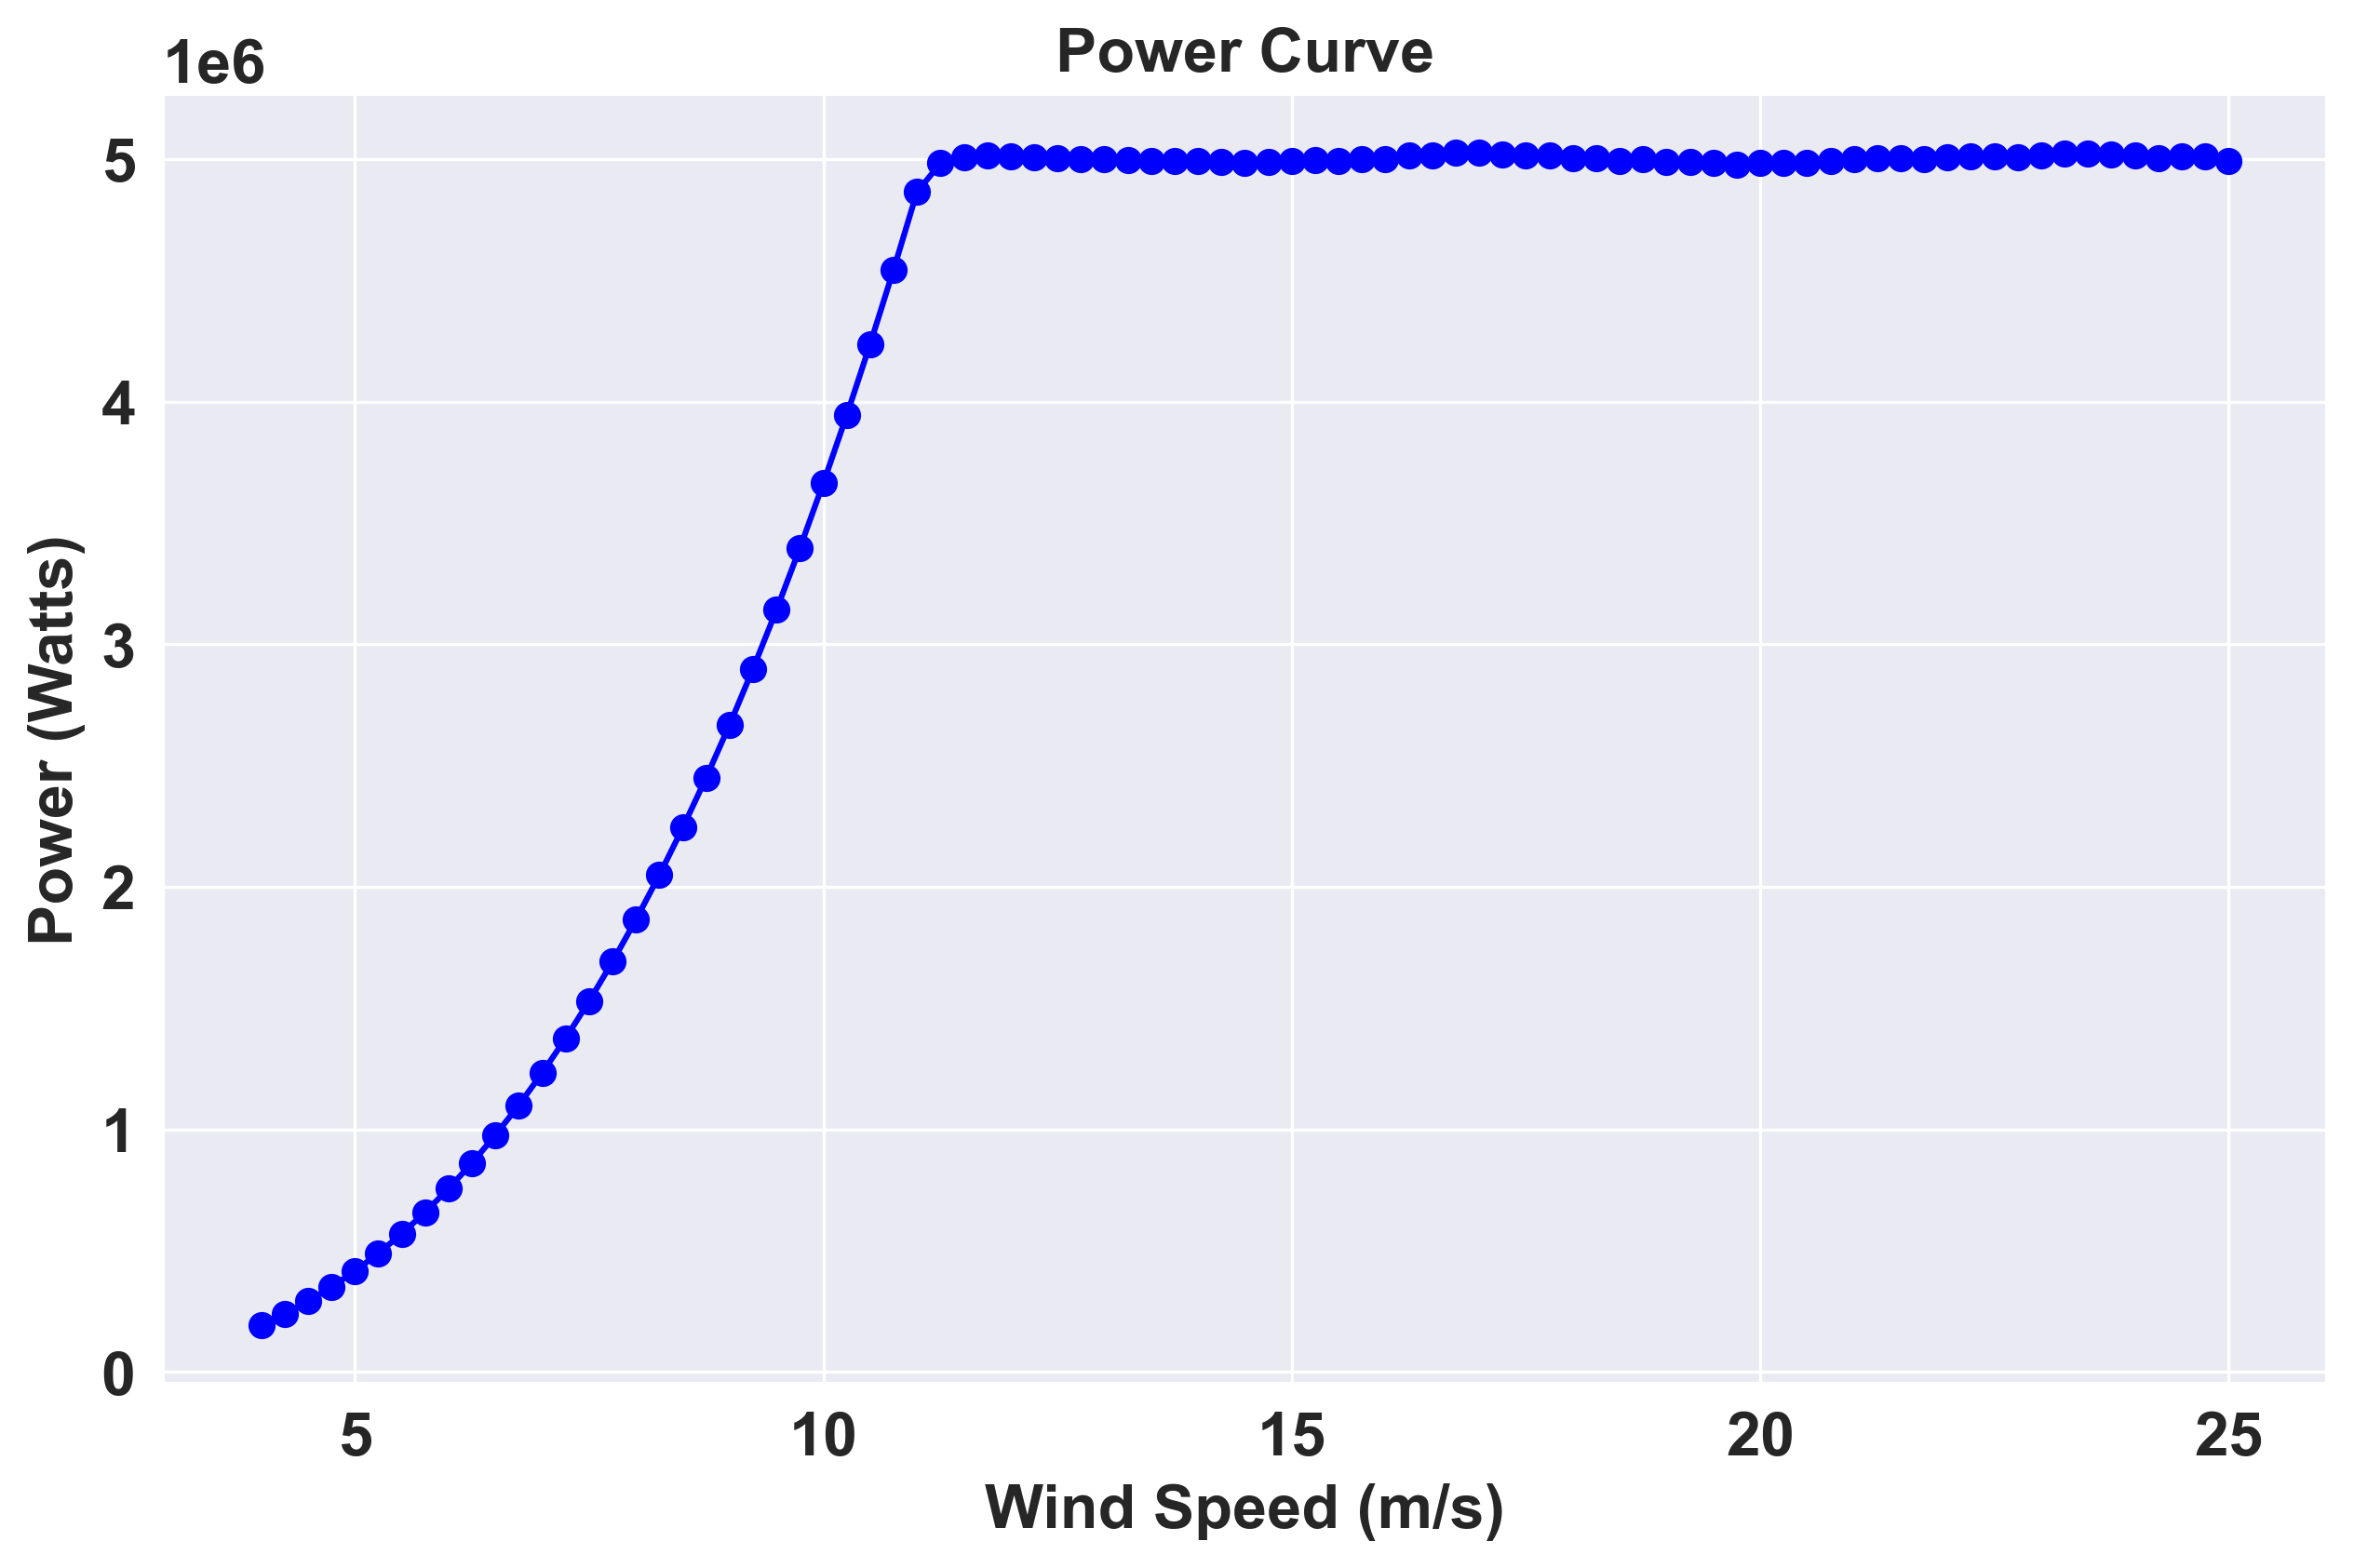

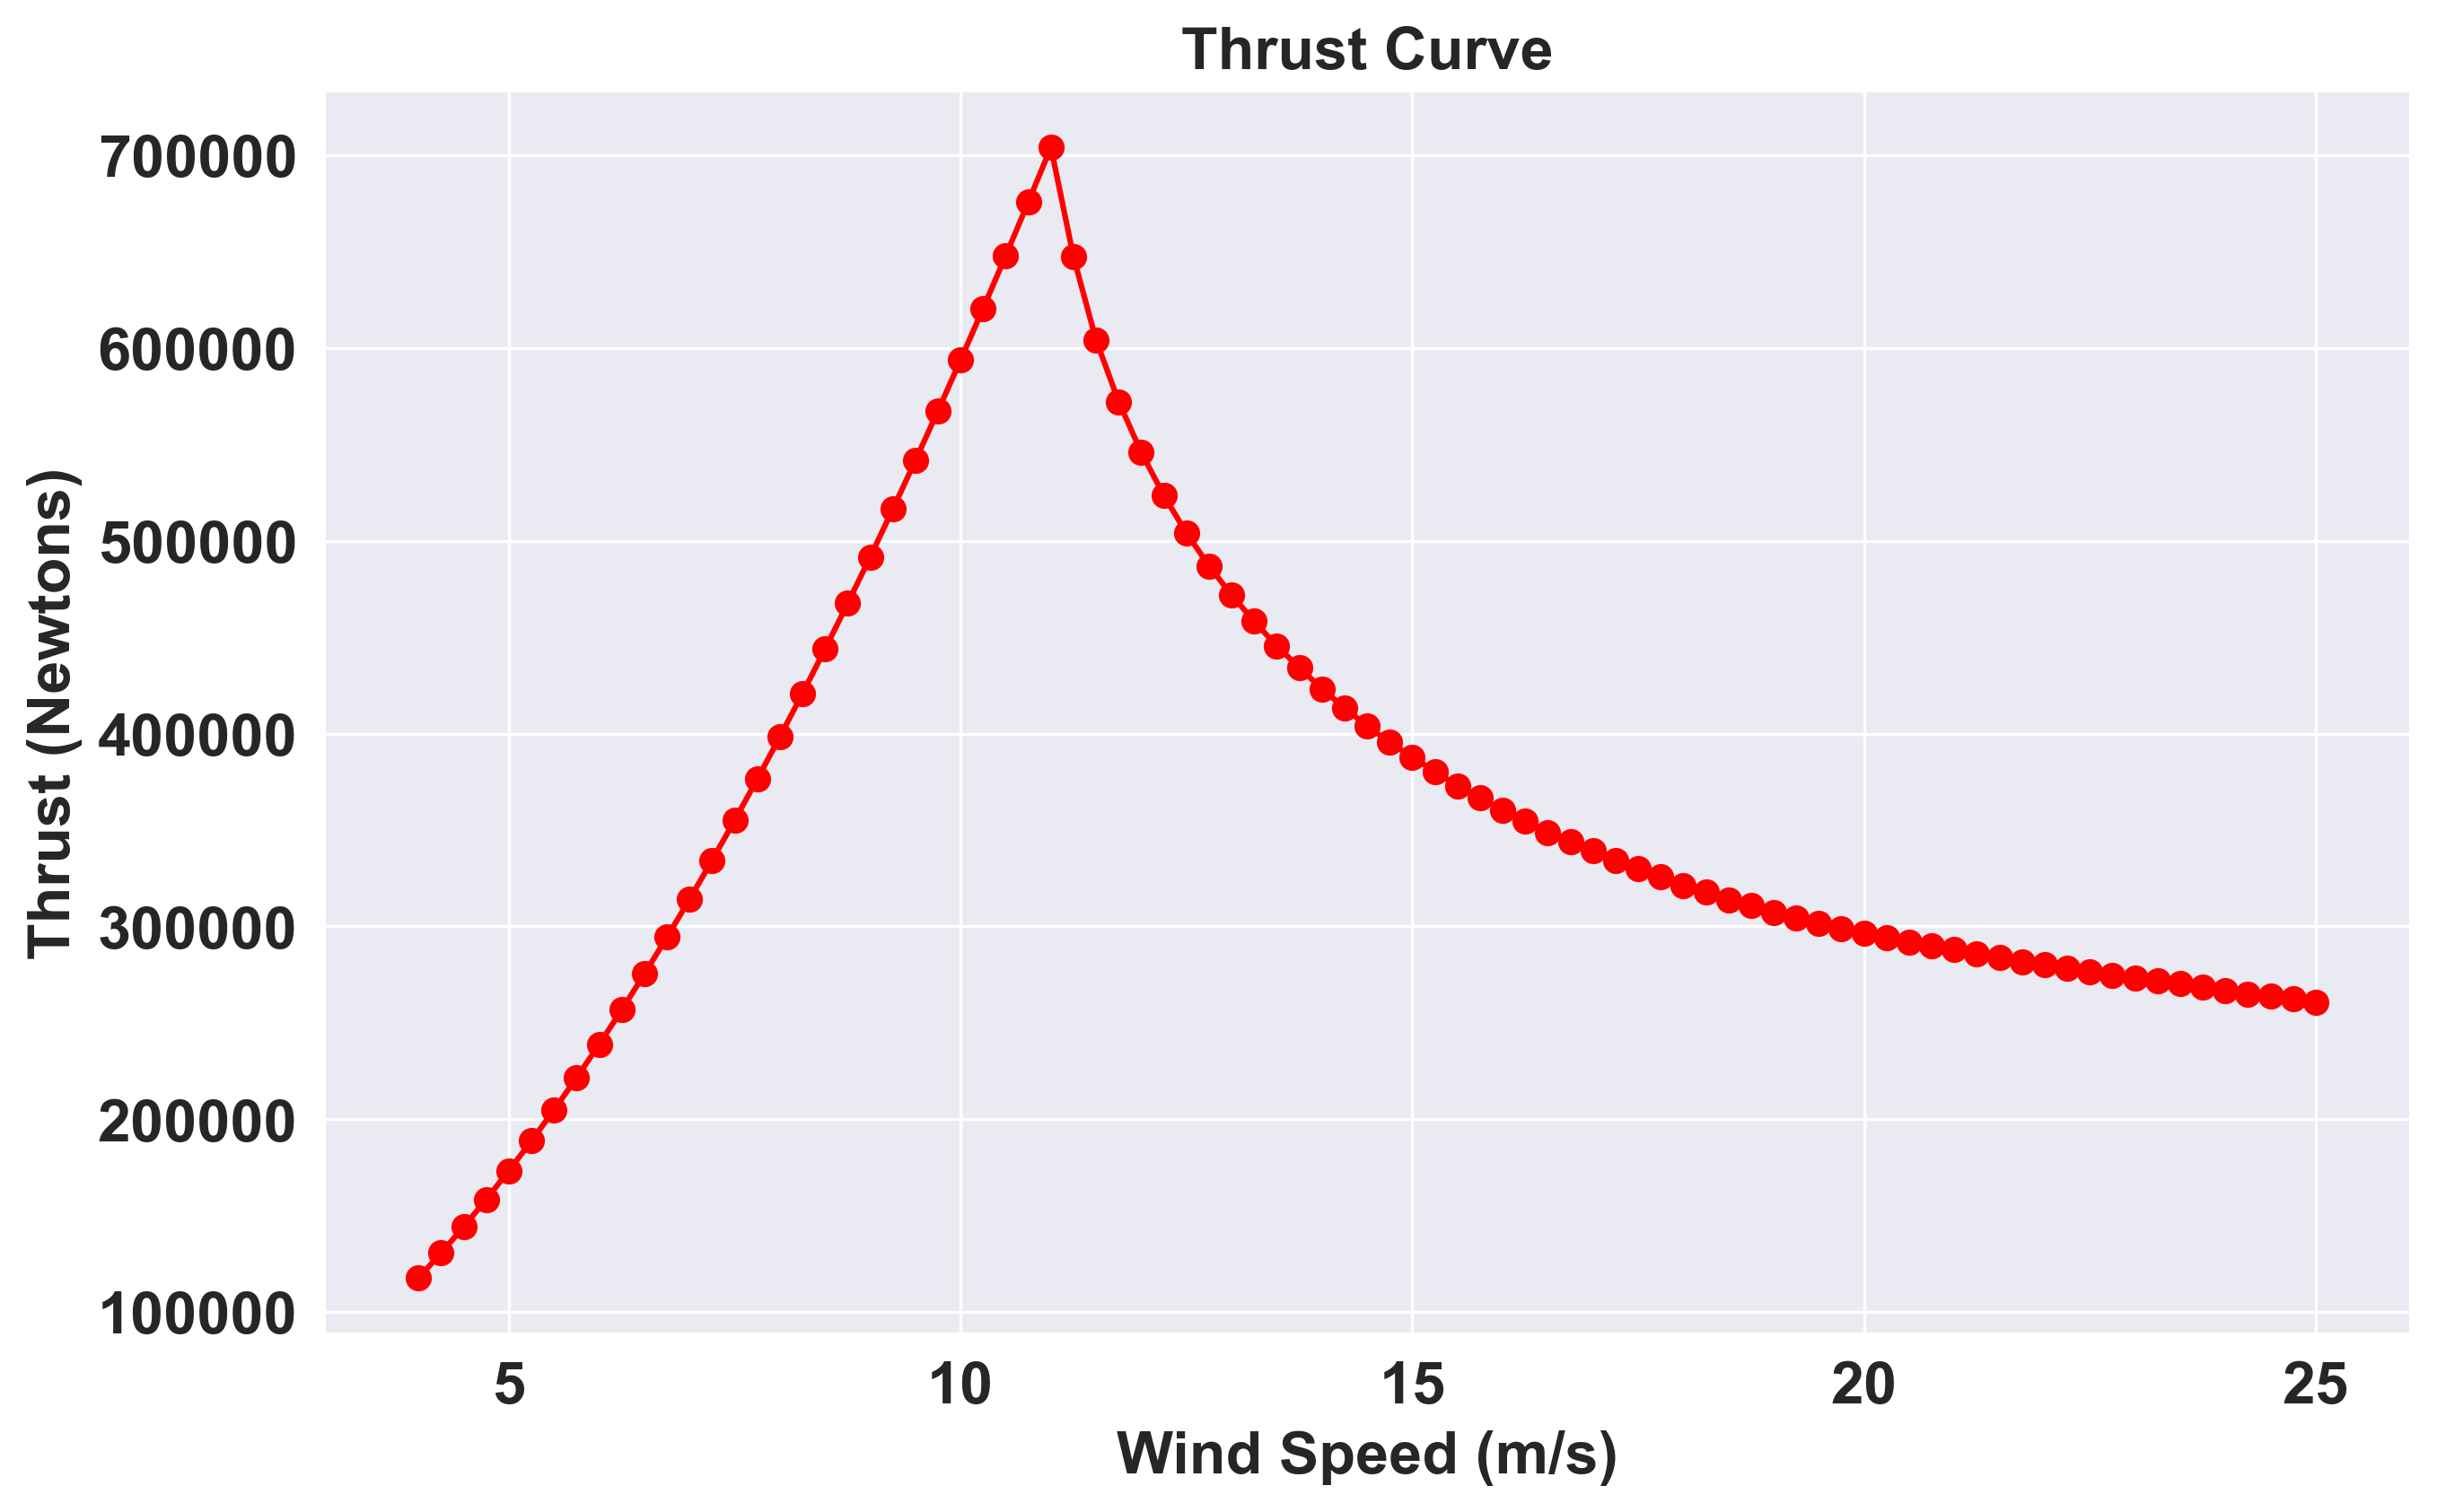

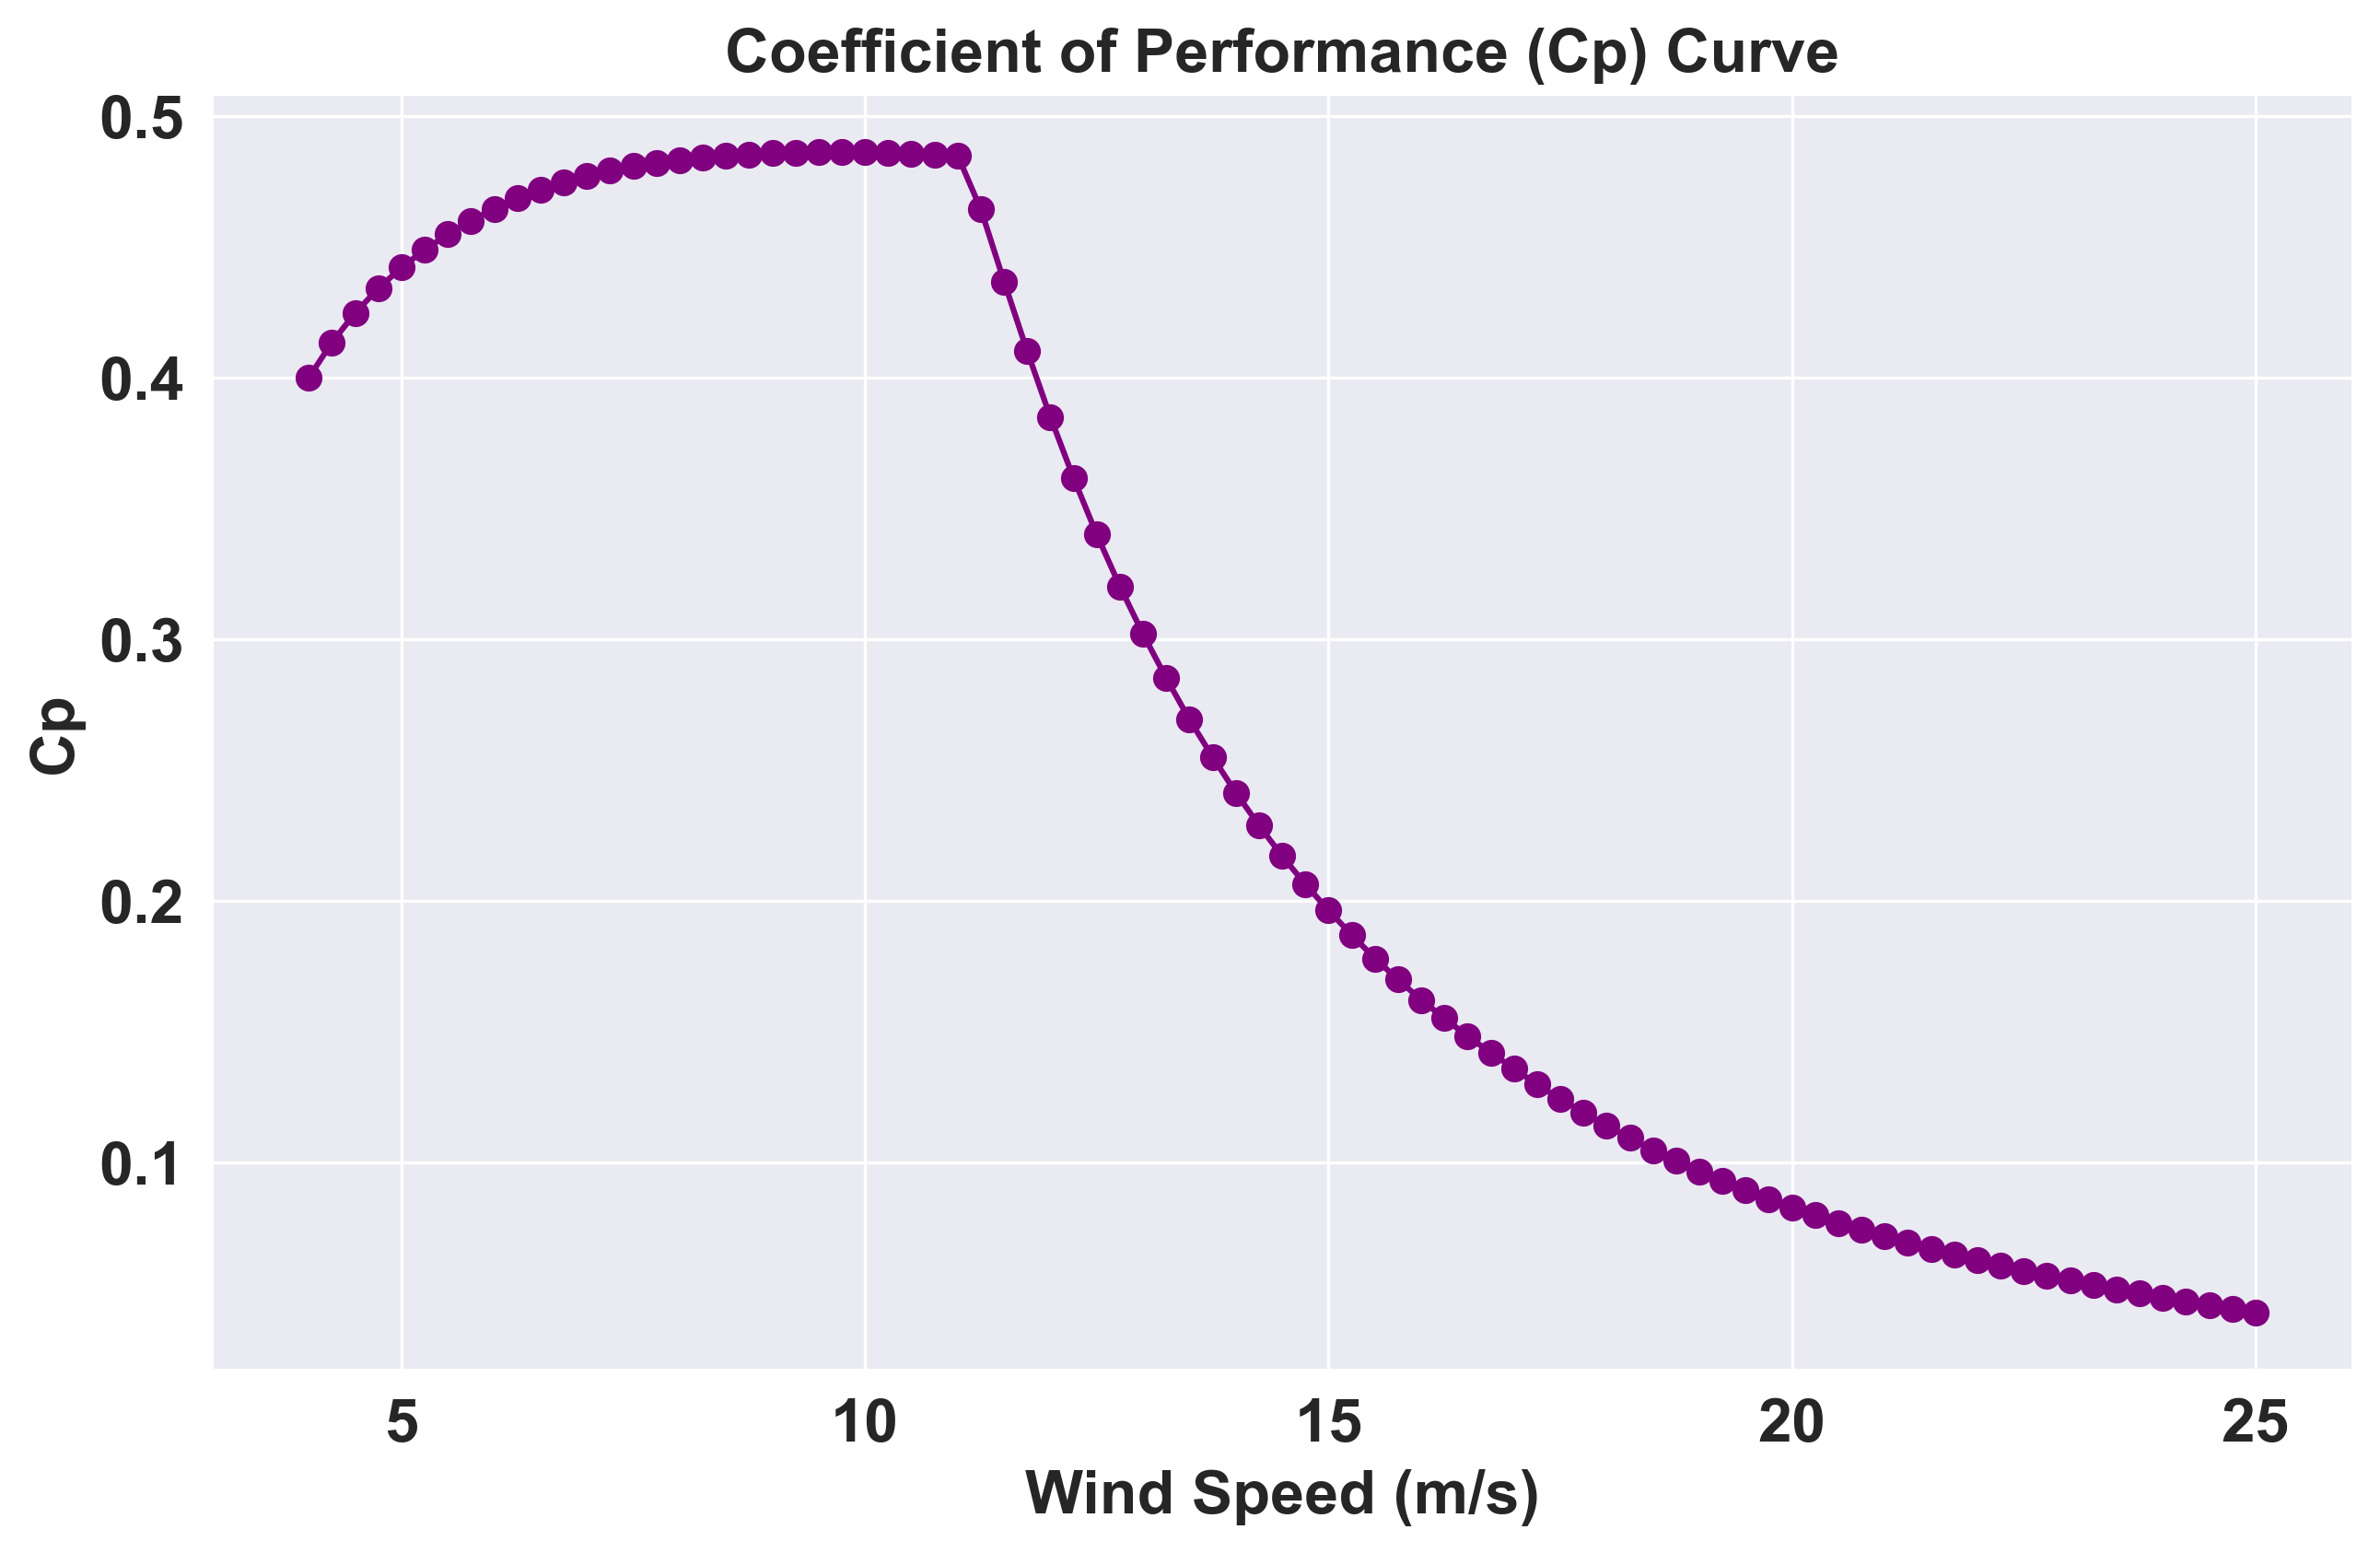

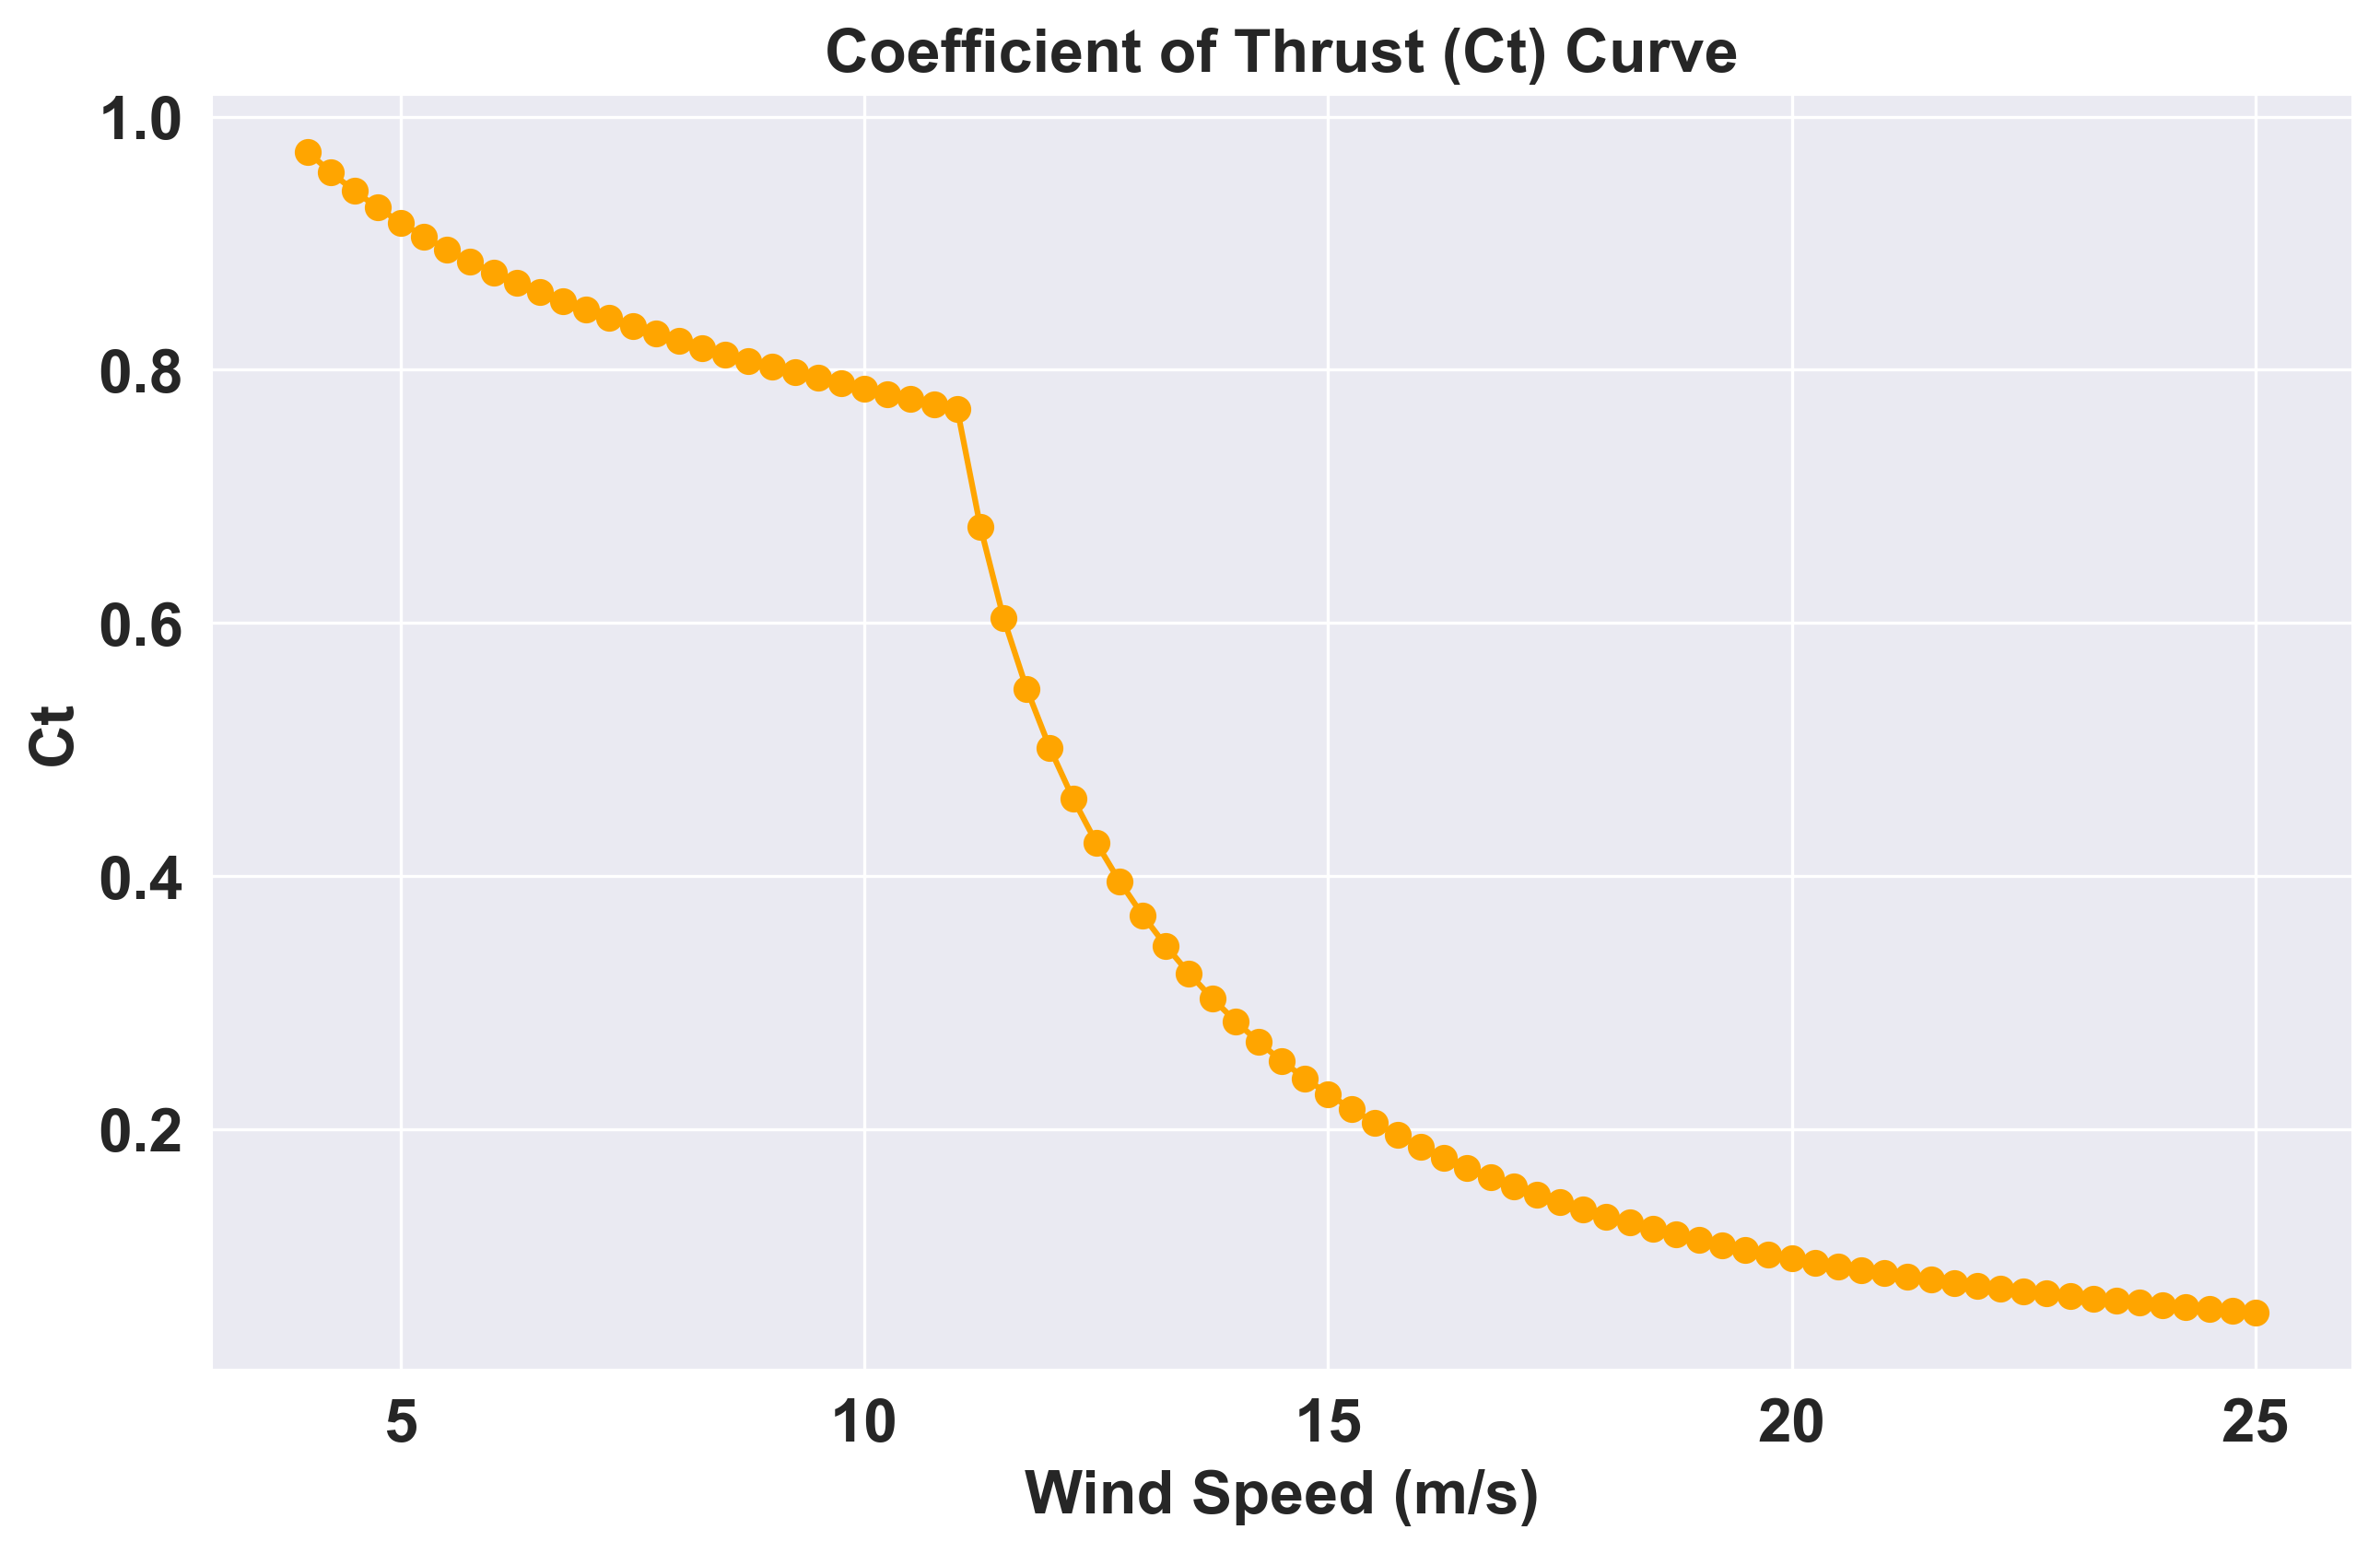

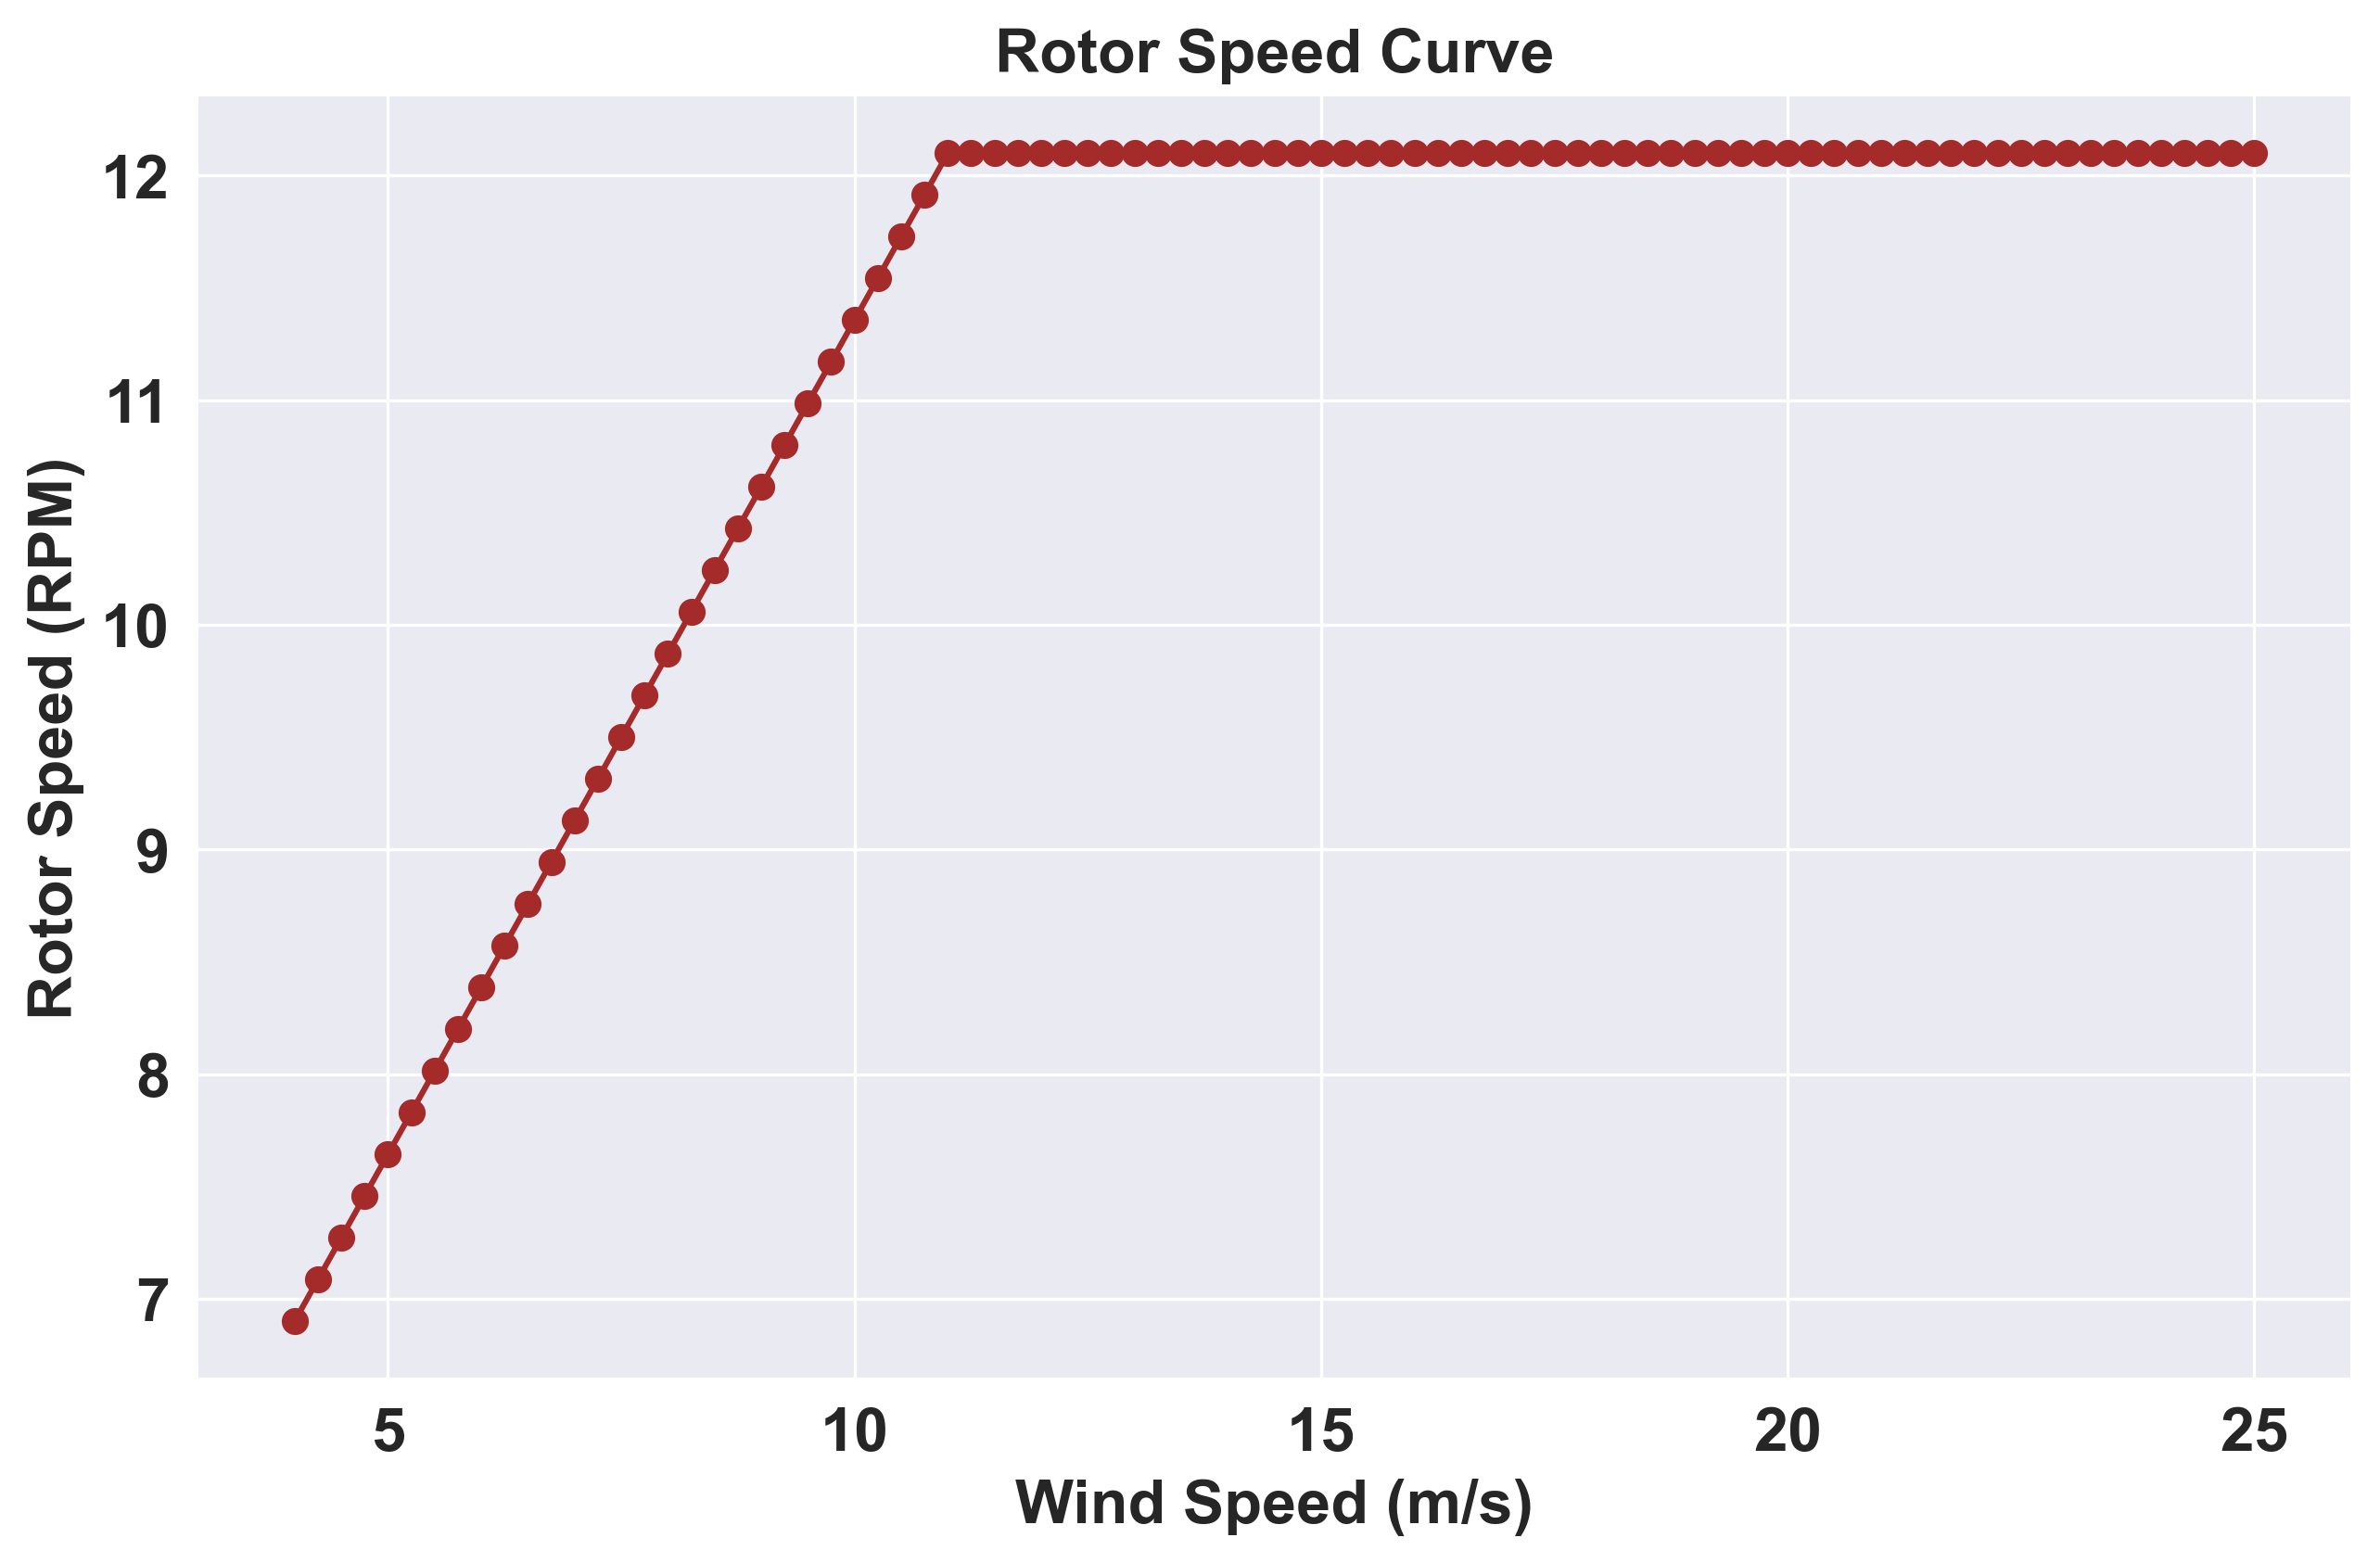

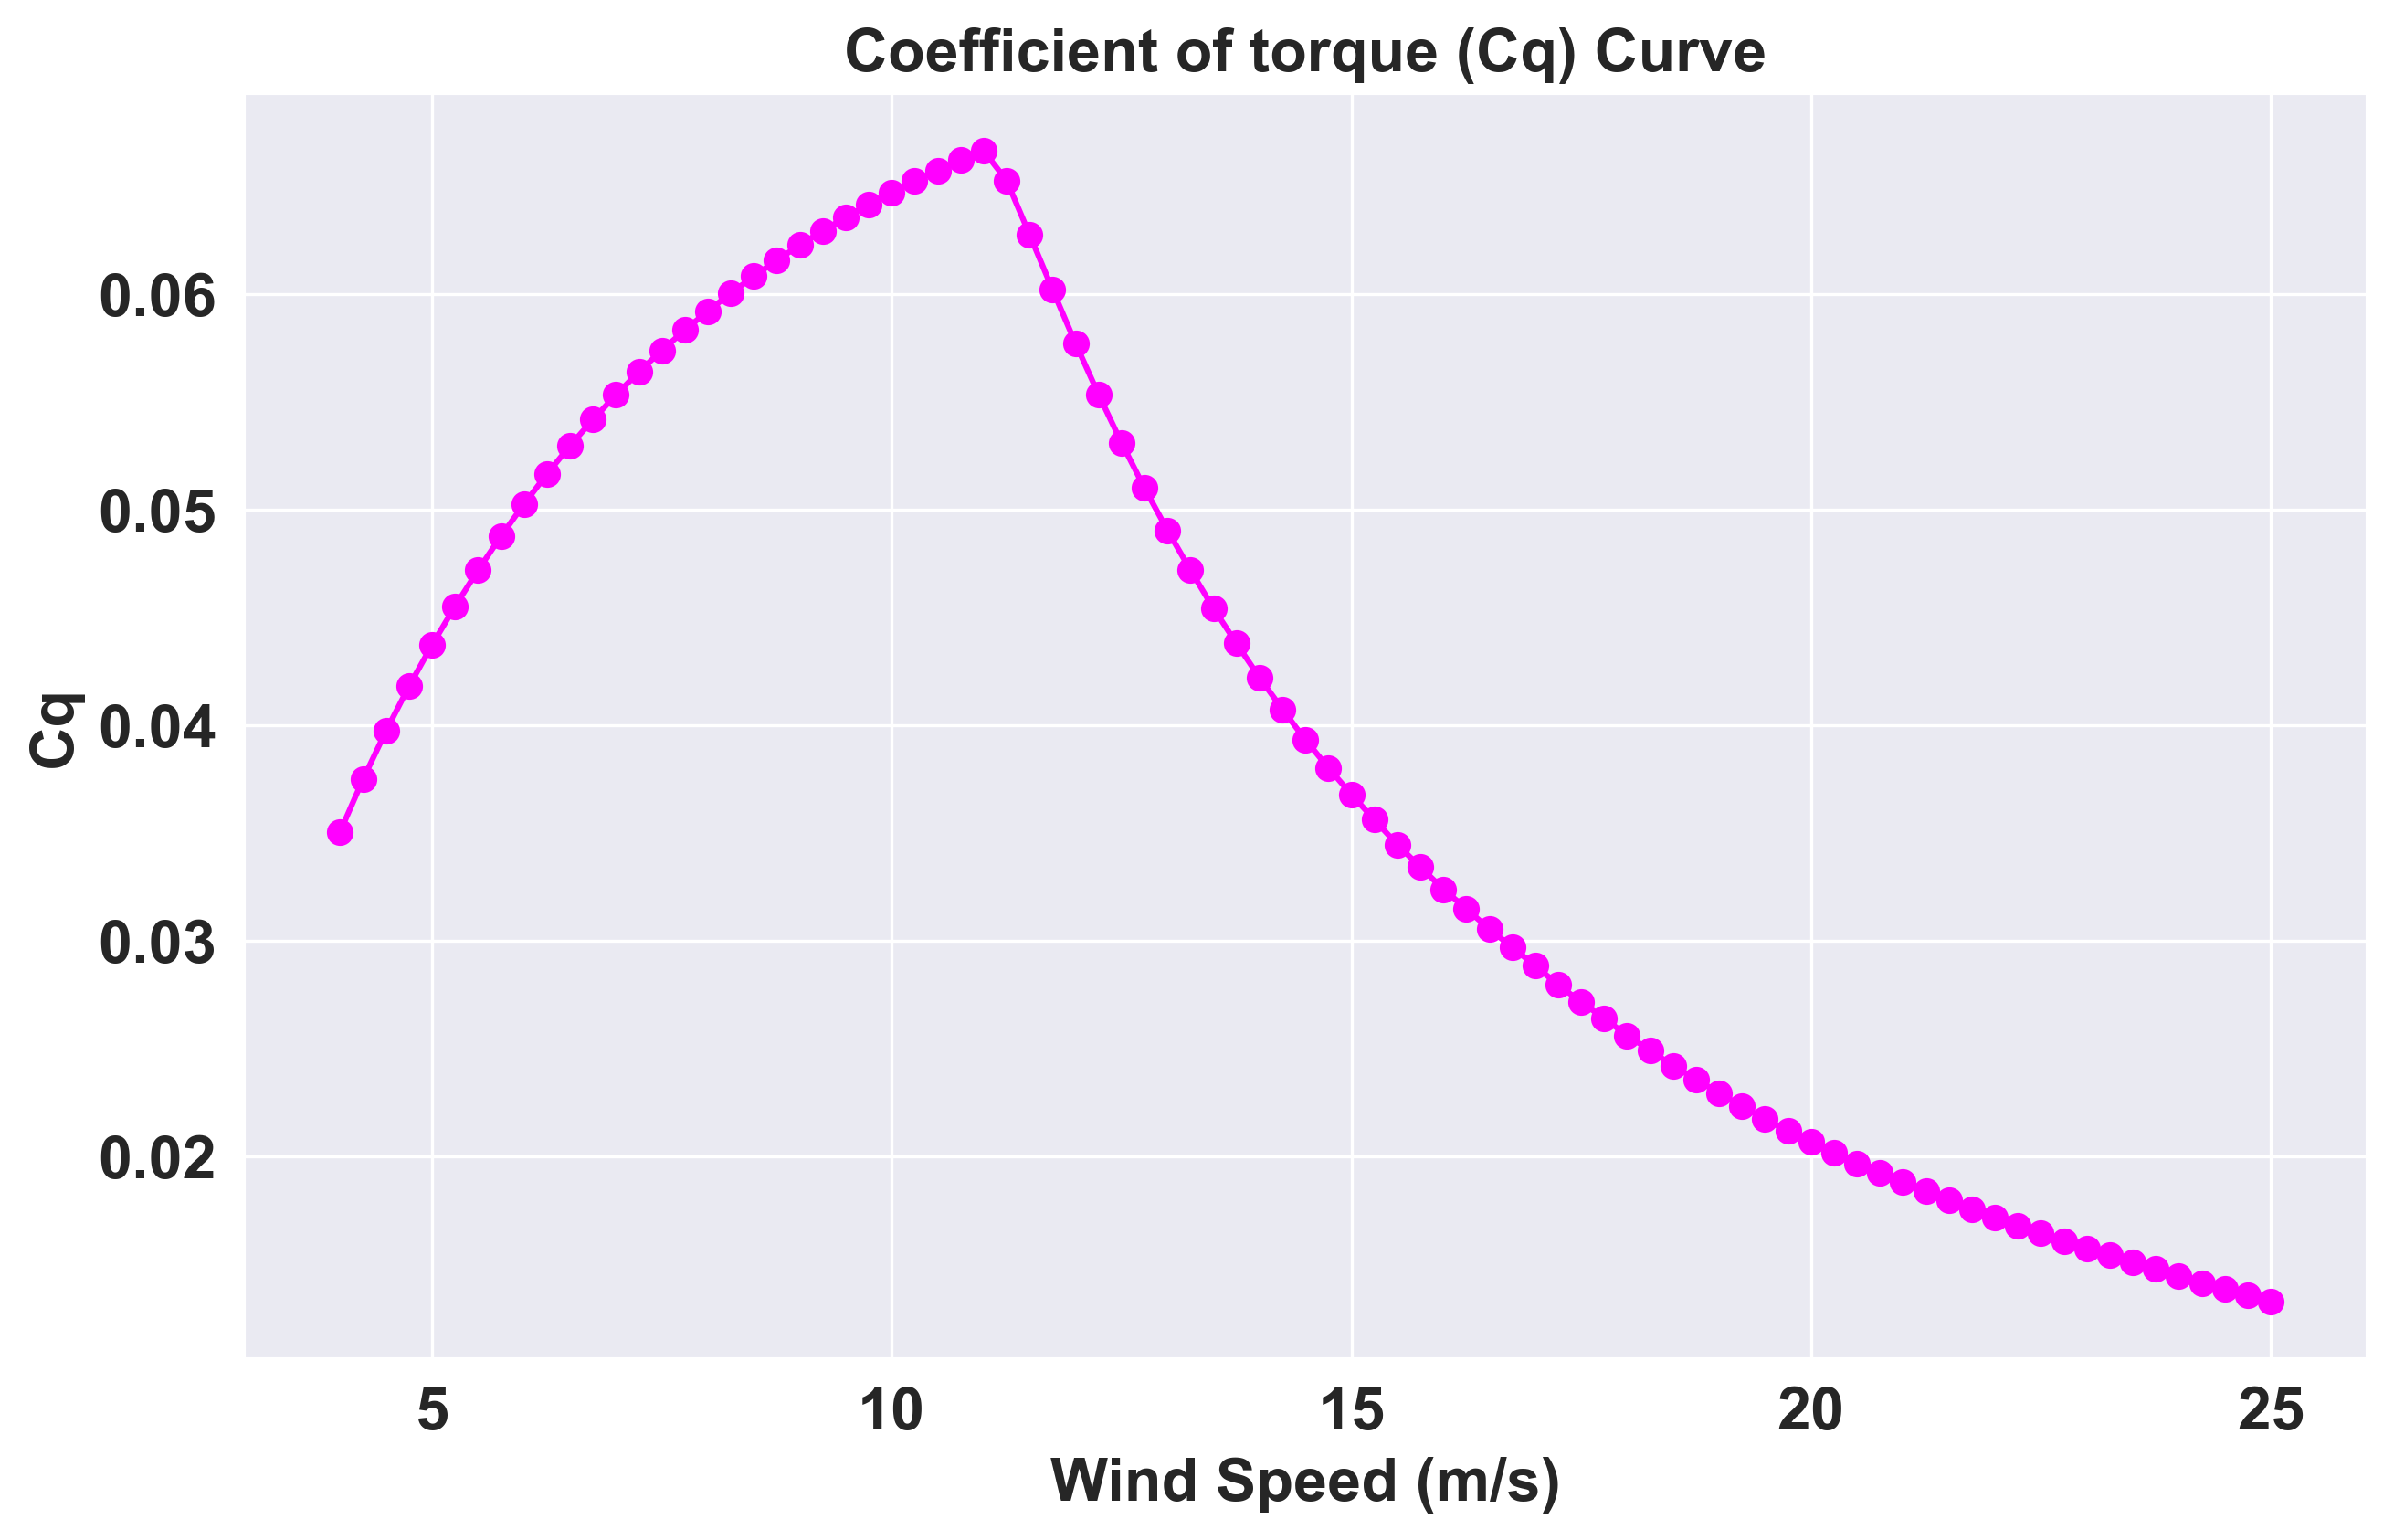

In [14]:
 # Power Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, power_curve, 'o-', color='blue')
plt.title('Power Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (Watts)')
plt.grid(True)
plt.savefig('Power curve.pdf',bbox_inches='tight')
plt.show()

# Thrust Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, thrust_curve, 'o-', color='red')
plt.title('Thrust Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Thrust (Newtons)')
plt.grid(True)
plt.savefig('Thrust curve.pdf',bbox_inches='tight')
plt.show()

# Tip Speed Ratio (TSR) Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, TSR_curve, 'o-', color='green')
plt.title('Tip Speed Ratio (TSR) Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('TSR')
plt.grid(True)
plt.savefig('TSR curve.pdf',bbox_inches='tight')
plt.show()

# Coefficient of Performance (Cp) Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, Cp_curve, 'o-', color='purple')
plt.title('Coefficient of Performance (Cp) Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Cp')
plt.grid(True)
plt.savefig('Cp curve.pdf',bbox_inches='tight')
plt.show()

# Coefficient of Thrust (Ct) Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, Ct_curve, 'o-', color='orange')
plt.title('Coefficient of Thrust (Ct) Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Ct')
plt.grid(True)
plt.savefig('Ct curve.pdf',bbox_inches='tight')
plt.show()

# Rotor Speed Curve
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, speed_curve, 'o-', color='brown')
plt.title('Rotor Speed Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rotor Speed (RPM)')
plt.grid(True)
plt.savefig('Rotor speed curve.pdf',bbox_inches='tight')
plt.show()
#torque coefficient
plt.figure(figsize=(10, 6))
plt.plot(wndspeed, Cq_curve, 'o-', color='magenta')
plt.title('Coefficient of torque (Cq) Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Cq')
plt.grid(True)
plt.savefig('cq curve.pdf',bbox_inches='tight')
plt.show()

# -*- coding: utf-8 -*-
"""
Created on Thu Jan  30 13:45:51 2024

@author: Astrid Berg Rosland
"""

In [7]:
#extracted data from line 22-106 in file driver_EX1.dvr to csv so easier to read in python
data=pd.read_csv('data_from_driver_EX1.csv',delim_whitespace=' ')

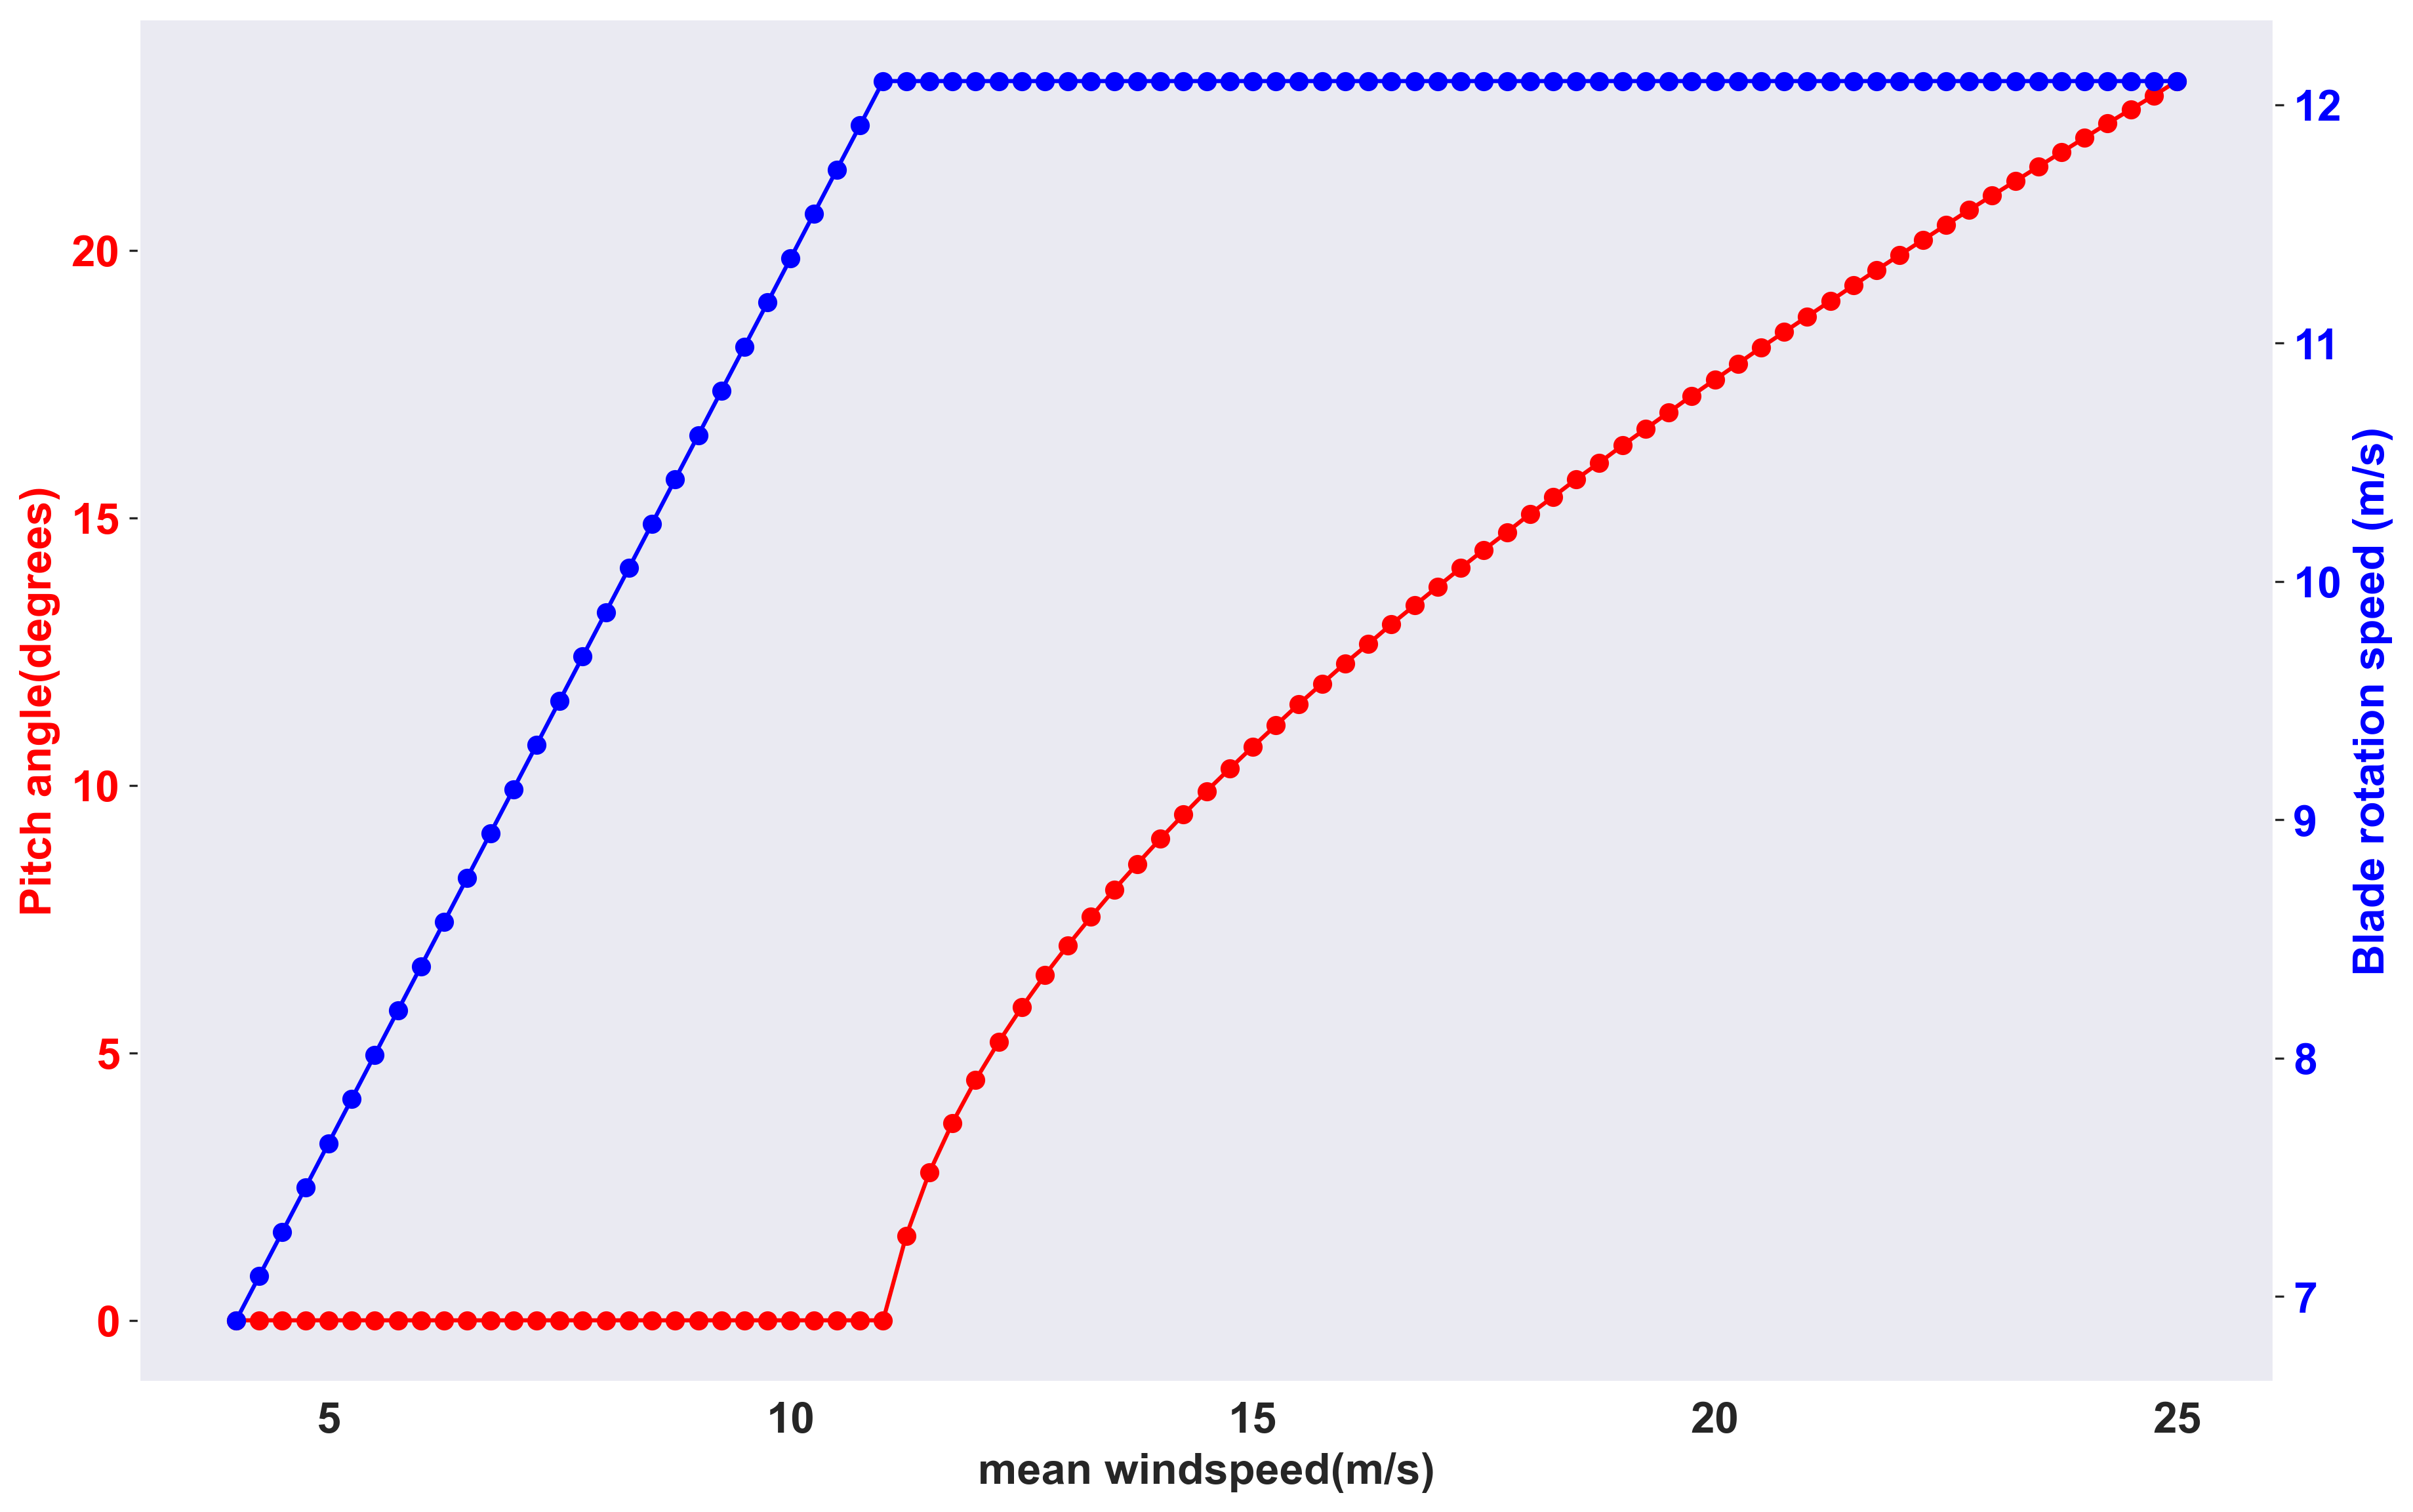

In [8]:
fig, ax1 =plt.subplots(figsize=(14,9))
ax1.set_xlabel('mean windspeed(m/s)')
ax2=ax1.twinx()
ax1.plot(data['WndSpeed'],data['Pitch'], 'o-', color='red')
ax1.set_ylabel('Pitch angle(degrees)',color='red')
ax1.tick_params(axis='y',labelcolor='red')
ax2.plot(data['WndSpeed'],data['RotSpd'], 'o-', color='blue')
ax2.set_ylabel('Blade rotation speed (m/s)',color='blue')
ax2.tick_params(axis='y',labelcolor='blue')
ax1.grid(False)
ax2.grid(False)
plt.savefig('Pitch vs blade rot curve.pdf',bbox_inches='tight')
plt.show()

In [9]:
# to read matlab file in python 
import scipy.io
mat = scipy.io.loadmat('data_SNII.mat')


In [10]:
#extract values for power coefficient and mean wind from datafile mat
cp=mat['Cp']
u=mat['U']
#get values for power coefficient where mean wind is below 4 and over 25
u_min=cp[u<4]
u_max=cp[u>25]
#uses sum to check if it is zero if so can conclued that everywhere for the two are zero
cp_min=sum(u_min)
cp_max=sum(u_max)
print(cp_min)
print(cp_max)

0.0
0.0


In [11]:
#get capasity factor from power production: Cf= actual energy generated(MW)/(capasity(MW)*time period(h))
rho=1.225
R=62.575
P=(1/2)*np.pi*rho*(R**2)*(cp)*(u)**3
Cf=sum(P)/(5*10**6*len(u))
Cf

array([0.63293268])